# Machine Learning
Machine learning is a type of artificial  intelligence (AI) that provides  computers with the ability to learn  without being explicitly programmed.

It uses that data to detect patterns in data	and	adjust	program	actions  accordingly.


**Libraries for machine learning**

Scikit-learn\
TensorFlow and Keras\
PyTorch\
Natural language toolkit (NLTK)\
OpenCV

# AI vs machine learning
Artificial general intelligence is form of intelligence similar or equal to the human intelligence which will have a language and be able to learn and take decisions.

Machine learning is a type of artificial intelligence where we create an
    algorithm  that would learn from given data.
    
 We give the system an input and output and it will write a code to link the two after the code is written we can use it to give an output when we feed input to the system.

# Types of machine learning

**Supervised:** input and output are provided

**Unsupervised**: only output is provided

Reinforcement: machine will learn according to the feedback from environment An decide on actions its typical for automated systems that have to take decision without human interference example: self driving car at a yellow traffic should the car accelerate or go slower?


# Data cleaning in machine learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Check missing values
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [4]:
# pip install distutils
#%pip install distutils
#pip install setuptools

# Imputation of missing values

For various reasons, many real-world datasets contain missing values, often encoded as blanks, NaNs or other placeholders. Such datasets however are incompatible with scikit-learn estimators which assume that all values in an array are numerical, and that all have and hold meaning.
 
A basic strategy to use incomplete datasets is to discard entire rows and/or columns containing missing values. However, this comes at the price of losing data which may be valuable (even though incomplete). A better strategy is to impute the missing values, i.e., to infer them from the known part of the data.


# Univariate feature imputation

The Simple Imputer class provides basic strategies for imputing missing values.
 
Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located


In [5]:
from sklearn.impute import SimpleImputer

In [6]:
imputer=SimpleImputer(strategy='median')
df['age']=imputer.fit_transform(df[['age']])

# Imputation of multi-variate features
A more sophisticated approach is to use the Iterative Imputer class, which models each feature with missing values as a function of other features and uses that estimate for imputation. 

It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. 

Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds


In [7]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [8]:
imputer=IterativeImputer(max_iter=20,n_nearest_features=5,random_state=0) 
df['age']=imputer.fit_transform(df[['age']])

# Forward and backward fill

In [9]:
df=sns.load_dataset("titanic")
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [11]:
# Replace the missing values with forward fill
df['age'] = df['age'].ffill()

In [12]:
# Replace the missing values with backward fill
df['age'] = df['age'].bfill()

# Using KNN Imputer

In [13]:
from sklearn.impute import KNNImputer
# Create an imputer object with a KNN filling strategy
imputer = KNNImputer(n_neighbors=5)
# Fill the missing values using the KNN imputer
df['age'] = imputer.fit_transform(df[['age']])


# Inconsistencies in data

In [14]:
data={"Date":["2020-01-01","01-02-2000","2020-03-01","20-2020-04","2020-01-05","2020-01-06","2020-01-07","2020-01-08","2020-01-09","2020-01-10"],
      "Country":["China","USA","China","America","China","USA","China","United States","China","USA"],
      "Name":["John","Alice","John","Alice","John","Alice","John","Alice","John","Alice"],
      "Sales_2020":[100,200,300,400,500,600,700,800,900,1000],
      "Sales_2021":[120,220,320,420,520,620,720,820,920,1020]}

In [15]:
data=pd.DataFrame(data)
data

,Date,Country,Name,Sales_2020,Sales_2021
0,2020-01-01,China,John,100,120
1,01-02-2000,USA,Alice,200,220
2,2020-03-01,China,John,300,320
3,20-2020-04,America,Alice,400,420
4,2020-01-05,China,John,500,520
5,2020-01-06,USA,Alice,600,620
6,2020-01-07,China,John,700,720
7,2020-01-08,United States,Alice,800,820
8,2020-01-09,China,John,900,920
9,2020-01-10,USA,Alice,1000,1020


In [16]:
data["Date"] = pd.to_datetime(data["Date"], errors='coerce')
data["Date"] = data["Date"].dt.strftime("%Y-%m-%d")
data


,Date,Country,Name,Sales_2020,Sales_2021
0,2020-01-01,China,John,100,120
1,NaN,USA,Alice,200,220
2,2020-03-01,China,John,300,320
3,NaN,America,Alice,400,420
4,2020-01-05,China,John,500,520
5,2020-01-06,USA,Alice,600,620
6,2020-01-07,China,John,700,720
7,2020-01-08,United States,Alice,800,820
8,2020-01-09,China,John,900,920
9,2020-01-10,USA,Alice,1000,1020


In [17]:
# to fill the null vlaues of date column with constant value
data["Date"].fillna("2020-01-01", inplace = True)

In [18]:
# Harmonize the name of the countries
data['Country'].replace({'America': 'United States', 'USA': 'United States'}, inplace=True)


In [19]:
data = pd.DataFrame(data=data)


In [20]:
data = data.drop_duplicates(subset=["Name"])
data

,Date,Country,Name,Sales_2020,Sales_2021
0,2020-01-01,China,John,100,120
1,2020-01-01,United States,Alice,200,220


# Merging of data

In [21]:
data1={"id":[1,2,3,4,5],"Name":["Ali","Abdullah","Ahmed","Sultan","Haider"], "Age":[20,21,22,23,24]}
data1=pd.DataFrame(data1)
data1


,id,Name,Age
0,1,Ali,20
1,2,Abdullah,21
2,3,Ahmed,22
3,4,Sultan,23
4,5,Haider,24


In [22]:
data2={"id":[1,2,3,4,6],"City":["Lahore","Qasur","Karachi","Faislabad","Multan"], "Occupation":["Engineer","Doctor","Teacher","Businessman","Lawyer"]}
data2=pd.DataFrame(data2)
data2

,id,City,Occupation
0,1,Lahore,Engineer
1,2,Qasur,Doctor
2,3,Karachi,Teacher
3,4,Faislabad,Businessman
4,6,Multan,Lawyer


In [23]:
# Merge the two dataframes based on the id
data3 = pd.merge(data1, data2, on='id', how='inner')
data3

,id,Name,Age,City,Occupation
0,1,Ali,20,Lahore,Engineer
1,2,Abdullah,21,Qasur,Doctor
2,3,Ahmed,22,Karachi,Teacher
3,4,Sultan,23,Faislabad,Businessman


**Left Join:** Also known as a left outer join, this type of join returns all rows from the left table (the table mentioned first in the query) and the matched rows from the right table (the table mentioned second in the query). If there are no matches found in the right table, NULL values are included for the columns from the right table.

**Right Join:** Also known as a right outer join, this type of join is the reverse of the left join. It returns all rows from the right table and the matched rows from the left table. If there are no matches found in the left table, NULL values are included for the columns from the left table.

**Inner Join:** This type of join returns only the rows where there is a match between the columns in both the left and right tables. In other words, it returns the intersection of the two tables based on the join condition.

**Outer Join:** This is a generic term that refers to both left join and right join. It returns all rows from both tables, with matching rows from both tables where available. If there is no match for a row in one table, the result will contain NULL values for columns from that table.

# Concatenate different data sets

In [24]:
print(data1)
print(data2)

   id      Name  Age
0   1       Ali   20
1   2  Abdullah   21
2   3     Ahmed   22
3   4    Sultan   23
4   5    Haider   24
   id       City   Occupation
0   1     Lahore     Engineer
1   2      Qasur       Doctor
2   3    Karachi      Teacher
3   4  Faislabad  Businessman
4   6     Multan       Lawyer


In [25]:
# Concatenate both dataframes
data4=pd.concat([data1, data2], axis=0)
data4

,id,Name,Age,City,Occupation
0,1,Ali,20.0,NaN,NaN
1,2,Abdullah,21.0,NaN,NaN
2,3,Ahmed,22.0,NaN,NaN
3,4,Sultan,23.0,NaN,NaN
4,5,Haider,24.0,NaN,NaN
0,1,NaN,NaN,Lahore,Engineer
1,2,NaN,NaN,Qasur,Doctor
2,3,NaN,NaN,Karachi,Teacher
3,4,NaN,NaN,Faislabad,Businessman
4,6,NaN,NaN,Multan,Lawyer


In [26]:
data4=pd.concat([data1, data2], axis=1)
data4

,id,Name,Age,id,City,Occupation
0,1,Ali,20,1,Lahore,Engineer
1,2,Abdullah,21,2,Qasur,Doctor
2,3,Ahmed,22,3,Karachi,Teacher
3,4,Sultan,23,4,Faislabad,Businessman
4,5,Haider,24,6,Multan,Lawyer


# Normalization and Non linear transformation of data

Two types of transformations are available: quantile transforms and power transforms. Both quantile and power transforms are based on monotonic transformations of the features and thus preserve the rank of the values along each feature.

In many modeling scenarios, normality of the features in a dataset is desirable. Power transforms are a family of parametric, monotonic transformations that aim to map data from any distribution to as close to a Gaussian distribution as possible in order to stabilize variance and minimize skewness.

PowerTransformer currently provides two such power transformations, the Yeo-Johnson transform and the Box-Cox transform.



In [27]:
# Generate non normal distributed data (exponential distribution)
data = np.random.exponential(scale=2, size=1000)
data = pd.DataFrame(data, columns=['values'])
data

,values
0,1.923504
1,2.538312
2,1.475259
3,1.350195
4,6.128456
...,...
995,2.239309
996,1.988256
997,8.087296
998,1.749640


In [28]:
data.shape

(1000, 1)

c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='values', ylabel='Count'>

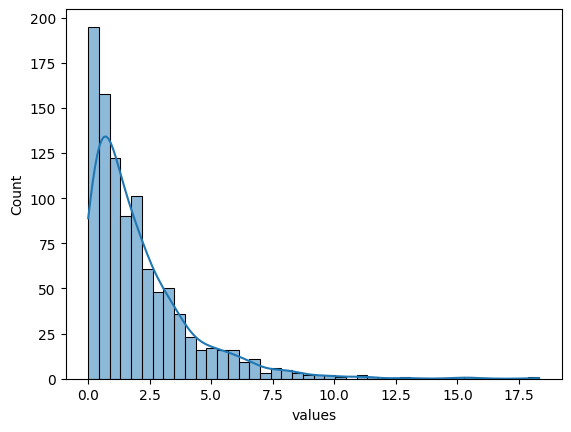

In [29]:
sns.histplot(data['values'], kde=True)

In [30]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
# Create a power transformer object
pt_box_cox = PowerTransformer(method='box-cox') # for non-negative values
pt_yeo_johnson = PowerTransformer(method='yeo-johnson') # for negative values
qt_normal=QuantileTransformer(output_distribution="normal")  # use quantile_transformer for non-gaussian distribution

In [31]:
data.min()

values    0.002089
dtype: float64

In [32]:
data["box_cox"] = pt_box_cox.fit_transform(data[["values"]])


In [33]:
data["yeo_johnson"]=pt_yeo_johnson.fit_transform(data[["values"]])

In [34]:
data["quantile"]=qt_normal.fit_transform(data[["values"]])

In [35]:
data

,values,box_cox,yeo_johnson,quantile
0,1.923504,0.309404,0.346921,0.270485
1,2.538312,0.586136,0.654591,0.561327
2,1.475259,0.062591,0.060819,0.038901
3,1.350195,-0.016123,-0.031863,-0.041413
4,6.128456,1.609474,1.618662,1.644369
...,...,...,...,...
995,2.239309,0.458627,0.514897,0.450080
996,1.988256,0.341408,0.383318,0.315012
997,8.087296,1.982692,1.899980,2.074445
998,1.749640,0.219326,0.243515,0.165095


c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


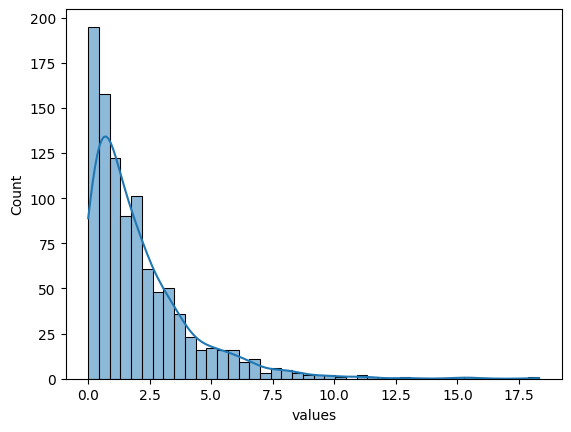

c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


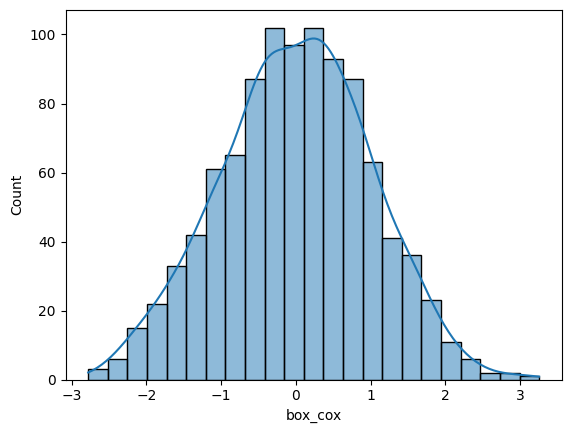

c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


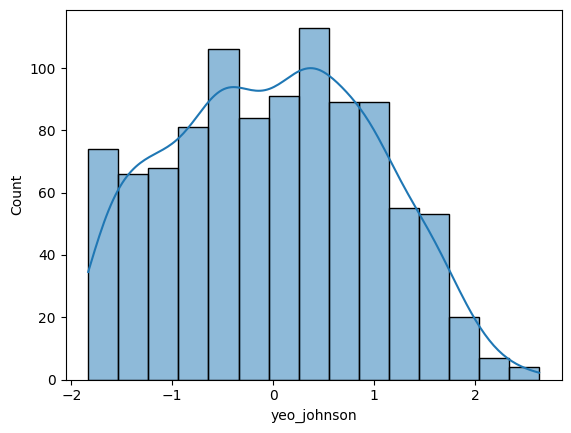

c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


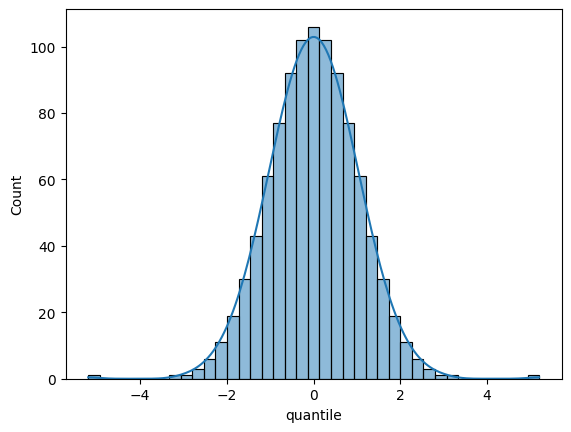

In [36]:
# Check if 'col' exists in the dataframe
for col in data:
    sns.histplot(data[col], kde=True)
    plt.show()



# Assignment: Read complete detail of box_cox and yeo_johnson and quantile distribution

# Normalization

Normalization is the process of scaling individual samples to have unit norm. This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.

L1 normalization is the process of making the sum of the absolute values of each row equal to 1\
L2 normalization is the process of making the sum of the squares of each row equal to 1

In [37]:
from sklearn.preprocessing import Normalizer
X = [[ 1, 1,  1],
     [ 1,  1,  0],
     [ 1,  0, 0]]
X_normalized = Normalizer(norm='l2')

X_normalized

Normalizer()

In [38]:
X_normalized.fit_transform(X)

array([[0.57735027, 0.57735027, 0.57735027],
       [0.70710678, 0.70710678, 0.        ],
       [1.        , 0.        , 0.        ]])

In [39]:
X_normalized = Normalizer(norm='l1')
X_normalized.fit_transform(X)

array([[0.33333333, 0.33333333, 0.33333333],
       [0.5       , 0.5       , 0.        ],
       [1.        , 0.        , 0.        ]])

# Feature encoding

Feature encoding, in the context of machine learning and data preprocessing, refers to the process of converting categorical or text-based features into numerical representations that can be used as input for machine learning algorithms.\
Label encoding\
Ordinal encoding\
one hot encoding\
binary encoding

In [40]:
tip = sns.load_dataset("tips")
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [41]:
print(tip["time"].value_counts())



time
Dinner    176
Lunch      68
Name: count, dtype: int64


In [42]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [43]:

le=LabelEncoder()
tip["encoded_time"] = le.fit_transform(tip["time"])

In [44]:
print(tip["encoded_time"].value_counts())

encoded_time
0    176
1     68
Name: count, dtype: int64


In [45]:
tip.head()

,total_bill,tip,sex,smoker,day,time,size,encoded_time
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [46]:
print(tip["day"].value_counts())

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64


In [47]:

# Apply the OrdinalEncoder
oe = OrdinalEncoder(categories=[["Thur", "Fri", "Sat", "Sun"]])


In [48]:
tip["encoded_day"] = oe.fit_transform(tip[["day"]])

In [49]:
tip["encoded_day"].value_counts()

encoded_day
2.0    87
3.0    76
0.0    62
1.0    19
Name: count, dtype: int64

In [50]:
tip["smoker"].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [51]:
ohe=OneHotEncoder()



In [52]:
ohe.fit_transform(tip[["smoker"]]).toarray()


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.

In [53]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
from category_encoders import BinaryEncoder

In [55]:
binary_encoder = BinaryEncoder()
binary_encoder=binary_encoder.fit_transform(tip[["day"]])
binary_encoder

,day_0,day_1,day_2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
239,0,1,0
240,0,1,0
241,0,1,0
242,0,1,0


# Pandas get dummies

In [56]:
dummies=pd.get_dummies(tip["day"])
dummies

,Thur,Fri,Sat,Sun
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
...,...,...,...,...
239,False,False,True,False
240,False,False,True,False
241,False,False,True,False
242,False,False,True,False


In [57]:
get_dummies=pd.get_dummies(tip, columns=["day"])
get_dummies

,total_bill,tip,sex,smoker,time,size,encoded_time,encoded_day,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,3.0,False,False,False,True
1,10.34,1.66,Male,No,Dinner,3,0,3.0,False,False,False,True
2,21.01,3.50,Male,No,Dinner,3,0,3.0,False,False,False,True
3,23.68,3.31,Male,No,Dinner,2,0,3.0,False,False,False,True
4,24.59,3.61,Female,No,Dinner,4,0,3.0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Dinner,3,0,2.0,False,False,True,False
240,27.18,2.00,Female,Yes,Dinner,2,0,2.0,False,False,True,False
241,22.67,2.00,Male,Yes,Dinner,2,0,2.0,False,False,True,False
242,17.82,1.75,Male,No,Dinner,2,0,2.0,False,False,True,False


# Data discretization
Data discretization is a process used in data preprocessing to transform continuous data into discrete intervals or categories. This technique is particularly useful when dealing with numerical features or variables that have a wide range of values and can simplify analysis, reduce complexity, and improve the performance of certain machine learning algorithms.


In [58]:
from sklearn.preprocessing import KBinsDiscretizer

In [59]:
titanic=sns.load_dataset("titanic")

In [60]:
# Impute missing values
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['fare'] = titanic['fare'].fillna(titanic['fare'].median())

In [61]:
# age Discretizer
age_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

In [62]:
titanic['age_discretized'] = age_discretizer.fit_transform(titanic[['age']])

c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [63]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_discretized
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2.0


c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

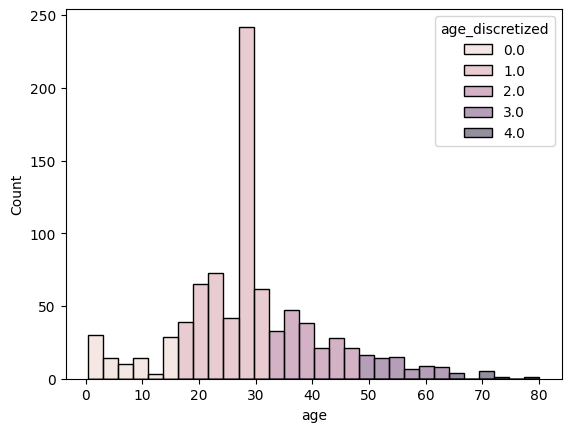

In [64]:
sns.histplot(data=titanic, x=titanic["age"], hue=titanic["age_discretized"])

c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

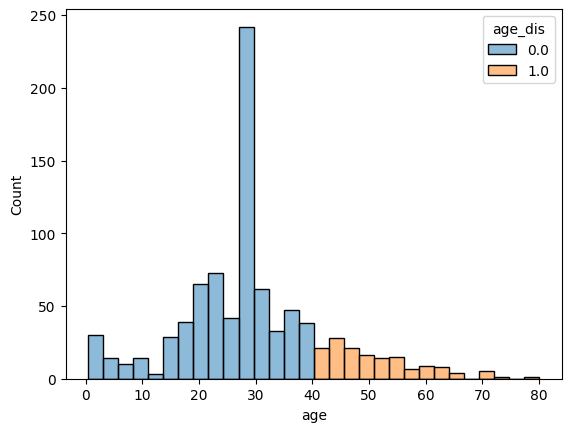

In [65]:
age_dis = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='uniform')
titanic['age_dis'] = age_dis.fit_transform(titanic[['age']])
sns.histplot(data=titanic, x=titanic["age"], hue=titanic["age_dis"])

c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

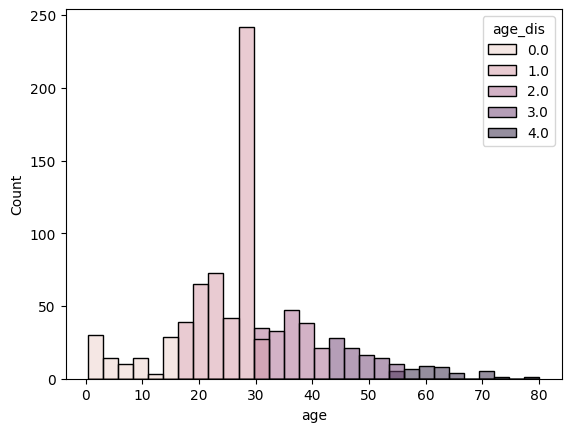

In [66]:
age_dis = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
titanic['age_dis'] = age_dis.fit_transform(titanic[['age']])
sns.histplot(data=titanic, x=titanic["age"], hue=titanic["age_dis"])

In [67]:
# Pandas method for bining
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_discretized,age_dis
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1.0,1.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2.0,2.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1.0,1.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2.0,2.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2.0,2.0


In [68]:

titanic["age_bins"] = pd.cut(titanic["age"].values, bins=3, labels=[0,1,2])
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_discretized,age_dis,age_bins
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1.0,1.0,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2.0,2.0,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1.0,1.0,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2.0,2.0,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2.0,2.0,1


c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adeel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


<Axes: xlabel='age', ylabel='Count'>

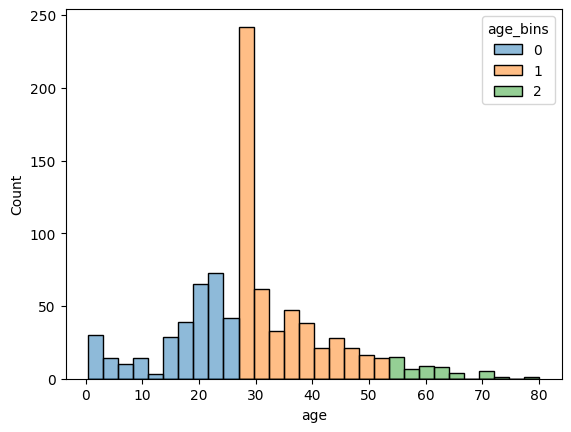

In [69]:
sns.histplot(data=titanic, x=titanic["age"], hue=titanic["age_bins"])

# Use of loc and iloc function

# loc 
loc is primarily label-based indexing, meaning that you use the row and column labels to access data.\
You specify the row label(s) and column label(s) inside the brackets to select specific rows and columns.

In [70]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_discretized,age_dis,age_bins
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1.0,1.0,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2.0,2.0,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1.0,1.0,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2.0,2.0,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2.0,2.0,1


In [71]:
# use the loc function in titanic data
titanic.loc[titanic["age"]>=50]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_discretized,age_dis,age_bins
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,3.0,3.0,2
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,3.0,4.0,2
15,1,2,female,55.0,0,0,16.0000,S,Second,woman,False,NaN,Southampton,yes,True,3.0,3.0,2
33,0,2,male,66.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True,4.0,4.0,2
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False,4.0,4.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,1,1,female,52.0,1,1,93.5000,S,First,woman,False,B,Southampton,yes,False,3.0,3.0,1
829,1,1,female,62.0,0,0,80.0000,NaN,First,woman,False,B,NaN,yes,True,3.0,4.0,2
851,0,3,male,74.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True,4.0,4.0,2
857,1,1,male,51.0,0,0,26.5500,S,First,man,True,E,Southampton,yes,True,3.0,3.0,1


In [72]:
# use iloc function in titanic data
titanic.iloc[0:5, 0:3]

,survived,pclass,sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male


# Different terms in Machine learning

**Algorithm:** A set of rules and instructions given to an AI system to help it learn from data.
  Example: decision tree is algorithm used in regression and classification tasks.

**Training data**: The data set used to train the ML model. It is labelled data for supervised learning.
Example: A set of images of cat and dogs, each labelled with cat and dog.

**Testing data:** Data used to evaluate the performance of the model after training. It is unseen by the model during training.

Example: A new set of images not included in the training data used to check the accuracy of the trained model.

**Features:** Individual measurable properties or characteristics of the phenomenon being observed, used as input variables in the model.
Example: In a dataset of house price prediction, features might include square footage, number of bedrooms and age of house.

**Model:** In a machine learning, a model refers to the specific representation learned from the data based on which predictions and decisions are made.
Example: A neural network trained to identify objects in images.

